In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
ROOT="/content/drive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/drive


In [ ]:
#added code

# Week 2 - Class 2 - Data Analysis

This notebook have good example exercises to get you going on data analysis

# Coronavirus (COVID-19) Visualization & Prediction  
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections.

   Coronavirus Case Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>World Health Organization</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>Centers for Disease Control and Prevention</a>
   <br>Check out map visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>JHU CCSE Dashboard</a>
   <br>Source code is also on <a href='https://github.com/therealcyberlord'>my Github</a>
   
   
   ```Last update: 1/16/2023 7:41 PM ET. New Updates: Daily report data update for 1/16/23. time series data update for 1/15/23. ```

source: https://www.kaggle.com/code/therealcyberlord/coronavirus-covid-19-visualization-prediction/notebook

In [54]:
import sklearn.model_selection as sk

In [ ]:
sk.train_test_split()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator
%matplotlib inline
import warnings

plt.style.use('seaborn-poster')
warnings.filterwarnings("ignore")

<ipython-input-2-aafedaf1d530>:18: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [3]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-15-2023.csv')

In [7]:
deaths_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598


In [5]:
confirmed_df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457


In [8]:
latest_data.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2023-01-16 04:21:05,33.93911,67.709953,207900,7854,NaN,NaN,Afghanistan,534.058207,3.777778
1,NaN,NaN,NaN,Albania,2023-01-16 04:21:05,41.15330,20.168300,334037,3596,NaN,NaN,Albania,11607.373688,1.076527


In [6]:
confirmed_df.shape

(289, 1147)

In [ ]:
def function_name(arg1,arg2,arg3):
  ####
  arg1+arg2=out
  return out

In [17]:
def count_elements_with_characters(lst):
    count = 0
    for element in lst:
        if any('a' <= char <= 'z' for char in element):
            count += 1
    return count

In [20]:
def count_non_date_elements(lst):
  from datetime import datetime

  count = 0
  for element in lst:
      try:
          datetime.strptime(element, '%m/%d/%y')
      except ValueError:
          count += 1
  return count


In [9]:
confirmed_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [16]:
confirmed_cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

In [12]:
confirmed_df.loc[:, confirmed_cols[4]:]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0,0,0,0,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,0,0,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,0,0,0,0,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [11]:
confirmed_cols = confirmed_df.columns
deaths_cols = deaths_df.columns

In [13]:
confirmed_cols = confirmed_df.columns
deaths_cols = deaths_df.columns

confirmed = confirmed_df.loc[:, confirmed_cols[4]:]
deaths = deaths_df.loc[:, deaths_cols[4]:]

In [18]:
count_elements_with_characters(confirmed_cols)


4

In [21]:
count_non_date_elements(confirmed)

0

In [23]:
confirmed.head(2)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457


In [22]:
num_dates = len(confirmed.columns)
ck = confirmed.columns
dk = deaths.columns

world_cases = []
total_deaths = []
mortality_rate = []



In [24]:
num_dates

1143

In [26]:
ck[1143-1]

'3/9/23'

In [27]:
# what is this number?
confirmed[ck[1143-1]].sum() #all the confirmed cases on that date

676570149

In [31]:
ck[0]

'1/22/20'

In [32]:
confirmed['1/22/20']

0      0
1      0
2      0
3      0
4      0
      ..
284    0
285    0
286    0
287    0
288    0
Name: 1/22/20, Length: 289, dtype: int64

In [33]:
num_dates = len(confirmed.columns)
ck = confirmed.columns
dk = deaths.columns

world_cases = []
total_deaths = []
mortality_rate = []

# list comprehension of this?
for i in range(num_dates):
    confirmed_sum = confirmed[ck[i]].sum()
    death_sum = deaths[dk[i]].sum()

    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)

    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)

In [ ]:
world_cases,total_deaths

In [34]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

In [40]:
world_cases

[557,
 657,
 944,
 1437,
 2120,
 2929,
 5580,
 6169,
 8237,
 9927,
 12038,
 16787,
 19887,
 23899,
 27644,
 30806,
 34400,
 37131,
 40162,
 42771,
 44814,
 45232,
 60384,
 66912,
 69055,
 71238,
 73273,
 75155,
 75655,
 76216,
 76846,
 78608,
 78990,
 79558,
 80412,
 81384,
 82728,
 84152,
 86023,
 88402,
 90382,
 92994,
 95338,
 98078,
 102062,
 106199,
 109997,
 114292,
 119051,
 126527,
 133283,
 146477,
 157365,
 168598,
 183165,
 198339,
 215900,
 242987,
 272517,
 304944,
 339156,
 381711,
 423594,
 475075,
 535889,
 599820,
 669402,
 725918,
 790929,
 869371,
 955728,
 1038176,
 1122386,
 1182507,
 1254222,
 1328948,
 1397886,
 1480062,
 1567243,
 1653665,
 1729180,
 1847761,
 1919593,
 2004226,
 2082482,
 2176950,
 2264830,
 2343082,
 2419404,
 2495886,
 2571973,
 2654011,
 2736728,
 2820291,
 2903496,
 2974291,
 3045275,
 3121107,
 3198435,
 3282087,
 3371033,
 3449295,
 3523292,
 3600929,
 3680614,
 3771036,
 3860174,
 3950657,
 4035000,
 4110223,
 4186364,
 4271644,
 4355992

In [35]:


# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [46]:
ck[0]

'1/22/20'

In [45]:
np.array([i for i in range(len(ck))]).reshape(-1, 1)

array([[   0],
       [   1],
       [   2],
       ...,
       [1140],
       [1141],
       [1142]])

In [90]:
days_since_1_22 = np.array([i for i in range(len(ck))]).reshape(-1, 1)
world_cases = np.array(world_daily_increase).reshape(-1, 1)
total_deaths = np.array(world_daily_increase).reshape(-1, 1)

In [84]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(ck)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [85]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [55]:
len(world_cases)

1143

In [91]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern), we are using data from 8/1/22 and onwards for the prediction modeling
days_to_skip = 922
X_train_confirmed, \
X_test_confirmed, \
y_train_confirmed, \
y_test_confirmed = \
train_test_split(days_since_1_22[days_to_skip:], world_cases[days_to_skip:], test_size=0.07, shuffle=False)

In [75]:
len(X_test_confirmed)

16

In [77]:
X_test_confirmed

array([[1127],
       [1128],
       [1129],
       [1130],
       [1131],
       [1132],
       [1133],
       [1134],
       [1135],
       [1136],
       [1137],
       [1138],
       [1139],
       [1140],
       [1141],
       [1142]])

In [78]:
poly_X_test_confirmed

array([[1.00000000e+00, 1.12700000e+03, 1.27012900e+06, 1.43143538e+09],
       [1.00000000e+00, 1.12800000e+03, 1.27238400e+06, 1.43524915e+09],
       [1.00000000e+00, 1.12900000e+03, 1.27464100e+06, 1.43906969e+09],
       [1.00000000e+00, 1.13000000e+03, 1.27690000e+06, 1.44289700e+09],
       [1.00000000e+00, 1.13100000e+03, 1.27916100e+06, 1.44673109e+09],
       [1.00000000e+00, 1.13200000e+03, 1.28142400e+06, 1.45057197e+09],
       [1.00000000e+00, 1.13300000e+03, 1.28368900e+06, 1.45441964e+09],
       [1.00000000e+00, 1.13400000e+03, 1.28595600e+06, 1.45827410e+09],
       [1.00000000e+00, 1.13500000e+03, 1.28822500e+06, 1.46213538e+09],
       [1.00000000e+00, 1.13600000e+03, 1.29049600e+06, 1.46600346e+09],
       [1.00000000e+00, 1.13700000e+03, 1.29276900e+06, 1.46987835e+09],
       [1.00000000e+00, 1.13800000e+03, 1.29504400e+06, 1.47376007e+09],
       [1.00000000e+00, 1.13900000e+03, 1.29732100e+06, 1.47764862e+09],
       [1.00000000e+00, 1.14000000e+03, 1.29960000e

In [92]:

poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [61]:
from sklearn.preprocessing import MinMaxScaler
# Create MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
poly_X_train_confirmedN = scaler.fit_transform(poly_X_train_confirmed)
# Fit and transform the data
poly_X_test_confirmedN = scaler.fit_transform(poly_X_test_confirmed)

In [93]:
# polynomial regression
linear_model = LinearRegression( fit_intercept=True)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))


MAE: 330485.76022306085
MSE: 121083474142.82959


In [81]:
len(test_linear_pred)

16

In [63]:
len(world_cases)

1143

In [94]:
world_cases[1143-1]

array([177325])

In [66]:
mean_absolute_error(test_linear_pred, y_test_confirmed)/world_cases[1143-1]

array([0.06615795])

In [ ]:
print(linear_model.coef_)

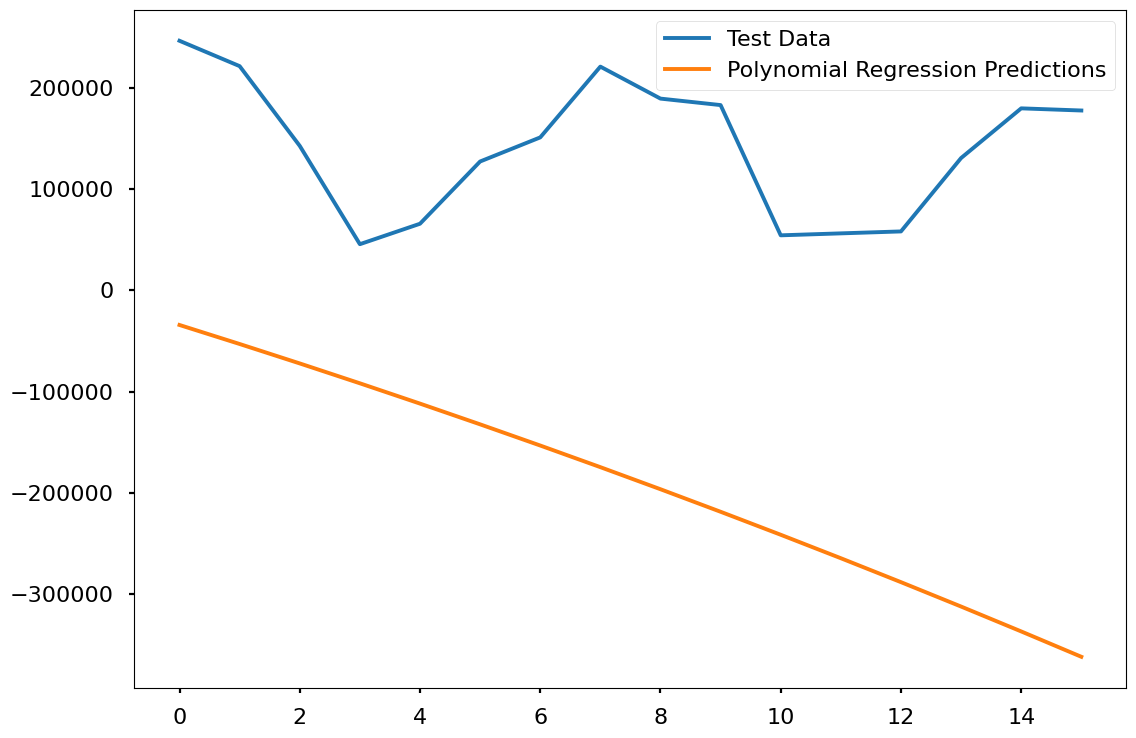

In [95]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

## Q16

In [ ]:
# https://scikit-learn.org/stable/getting_started.html#fitting-and-predicting-estimator-basics
# Apply a Random Forest Classifier (??) and do the same plot

In [100]:
 - Print, head, see it
 - Cleaning (confirm your data)
 - Model struture
 - Metric
 - Interpret
 - Conclusions

SyntaxError: invalid syntax (<ipython-input-100-1e96410eb49f>, line 1)

In [97]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint
#X, y = fetch_california_housing(return_X_y=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# define the parameter space that will be searched over
param_distributions = {'n_estimators': randint(1, 5),
                       'max_depth': randint(5, 10)}
# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(poly_X_train_confirmed, y_train_confirmed)
search.best_params_


{'max_depth': 7, 'n_estimators': 1}

In [98]:

# the search object now acts like a normal random forest estimator
# with max_depth=9 and n_estimators=4
search.score(poly_X_test_confirmed, y_test_confirmed)

-0.667131495339206

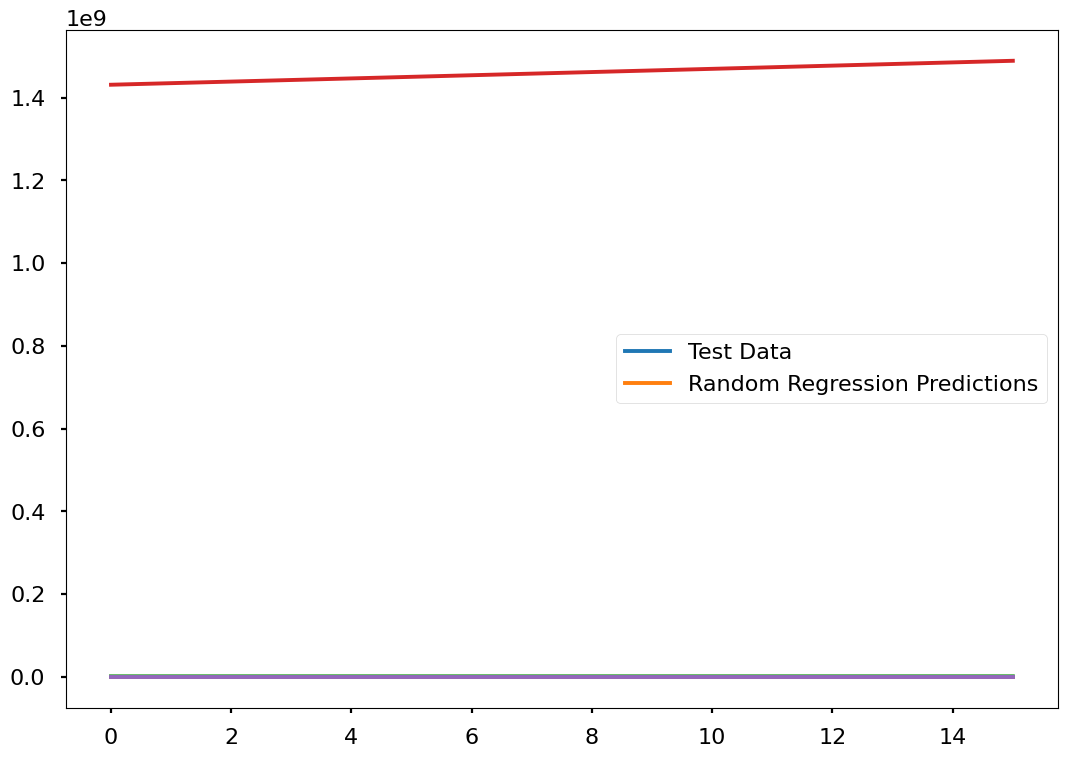

In [99]:
plt.plot(poly_X_test_confirmed)
predictions = search.predict(poly_X_test_confirmed)

plt.plot(predictions)
plt.legend(['Test Data', 'Random Regression Predictions'])

## Q17

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris_data = load_iris()

# Create a DataFrame
<your-answer>

# Add the target (species) column to the DataFrame
<your-answer>

# Map target numerical values to species names
<your-answer>




In [ ]:
# Display basic information
print("Basic Information:")

print("\nData Types:")


In [ ]:

print("\nSummary Statistics:")


In [ ]:

# Data Exploration
print("\nMean Values by Species:")



In [ ]:

print("\nMedian Values by Species:")


In [ ]:

print("\nMinimum Values by Species:")


In [ ]:

print("\nMaximum Values by Species:")


In [ ]:

print("\nCount of Species:")
